In [1]:
import pandas as pd
import glob

files = [i for i in glob.glob(r'/workspaces/miniconda/PKdata/data/*.csv') if 'nca' not in i]

In [2]:

for f_idx, f in enumerate(files):
    if f_idx == 0:
        df_out = pd.read_csv(f)
        df_out = df_out[[i for i in df_out.columns if 'unnamed' not in i.lower()]]
        df_out['TIME'] = df_out['TIME'].astype(float)
    else:
        tmp = pd.read_csv(f)
        tmp = tmp[[i for i in tmp.columns if 'unnamed' not in i.lower()]]
        if 'TIME' in tmp.columns:
            tmp['TIME'] = df_out['TIME'].astype(float)
            merge_c = ['ID', 'TIME']
        else:
            merge_c = ['ID']
        df_out = df_out.merge(tmp, how = 'left', on = merge_c)
        

In [3]:
import numpy as np
from nca import estimate_subject_slope_cv, estimate_k_halflife
xth_df = df_out.loc[df_out['ANALYTE'] == 'xanthohumol', :].copy()


In [4]:
xth_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex
0,L1,0.00,0,xanthohumol,20.0,oral,M
1,L1,0.25,0,xanthohumol,NaN,NaN,M
2,L1,0.50,0,xanthohumol,NaN,NaN,M
3,L1,1.00,34,xanthohumol,NaN,NaN,M
4,L1,1.50,15,xanthohumol,NaN,NaN,M
...,...,...,...,...,...,...,...
1101,H17,24.00,6,xanthohumol,NaN,NaN,M
1102,H17,48.00,0,xanthohumol,NaN,NaN,M
1103,H17,72.00,0,xanthohumol,NaN,NaN,M
1104,H17,96.00,0,xanthohumol,NaN,NaN,M


In [5]:
tmp_df = pd.DataFrame({
    'ID':np.repeat('P1', 10), 
    'TIME':[0,1,2,3,4,6,9,12,18,24],
    'CONC':[8,7.09, 6.29, 5.58, 4.95, 3.89, 2.71, 1.89, 0.92, 0.44]
})
tmp_df2 = pd.DataFrame({
    'ID':np.repeat('P2', 10), 
    'TIME':[0,1,2,3,4,6,9,12,18,24],
    'CONC':[0, 12.18, 14.12, 13.43, 12.16, 9.64, 6.73, 4.69, 2.28, 1.11]
})
tmp_df = pd.concat([tmp_df, tmp_df2])

tmp_df['CONC_ln'] = np.log(tmp_df['CONC'])

/opt/conda/envs/pySunODE/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
tmp_df

,ID,TIME,CONC,CONC_ln
0,P1,0,8.00,2.079442
1,P1,1,7.09,1.958685
2,P1,2,6.29,1.838961
3,P1,3,5.58,1.719189
4,P1,4,4.95,1.599388
5,P1,6,3.89,1.358409
6,P1,9,2.71,0.996949
7,P1,12,1.89,0.636577
8,P1,18,0.92,-0.083382
9,P1,24,0.44,-0.820981


<Axes: xlabel='TIME', ylabel='CONC'>

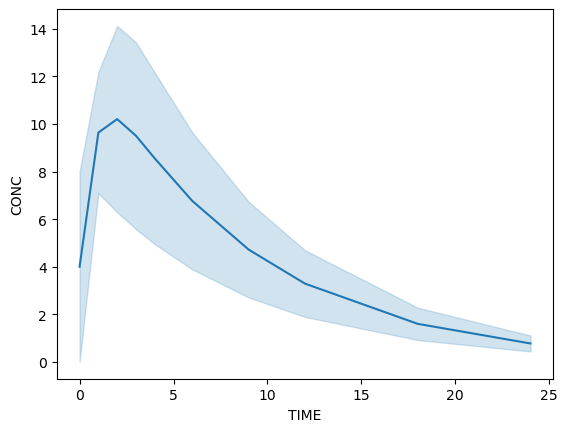

In [7]:
import seaborn as sns
sns.lineplot(tmp_df, x = 'TIME', y = 'CONC')


In [8]:
k_est = (np.log(.92) - np.log(.44)) / (18-24)
k_est

-0.1229331571884632

In [9]:
use_toy_2 = False
if use_toy_2:
    xth_df = tmp_df.copy()

In [10]:
xth_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex
0,L1,0.00,0,xanthohumol,20.0,oral,M
1,L1,0.25,0,xanthohumol,NaN,NaN,M
2,L1,0.50,0,xanthohumol,NaN,NaN,M
3,L1,1.00,34,xanthohumol,NaN,NaN,M
4,L1,1.50,15,xanthohumol,NaN,NaN,M
...,...,...,...,...,...,...,...
1101,H17,24.00,6,xanthohumol,NaN,NaN,M
1102,H17,48.00,0,xanthohumol,NaN,NaN,M
1103,H17,72.00,0,xanthohumol,NaN,NaN,M
1104,H17,96.00,0,xanthohumol,NaN,NaN,M


# K and Halflife (t_1/2)

In [11]:
dfs = []
for sub in xth_df['ID'].unique():
    dfs.append(estimate_subject_slope_cv(xth_df.loc[xth_df['ID'] == sub, :], conc_col='CONC'))

/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mea

In [54]:
look = [i for i in dfs if 'H1' in i['ID'].values][0]

In [12]:
look = dfs[0]

In [78]:
from nca import identify_low_conc_zones


zero_starts = identify_low_conc_zones(dfs, low_frac=.005)

In [79]:
zero_starts

,ID,zero_window_time_start,consecutive_zero_windows
0,L1,24.0,4
1,L2,72.0,2
2,L3,24.0,4
3,L4,2.0,8
4,L5,24.0,4
5,L6,12.0,5
6,L7,12.0,5
7,L8,24.0,4
8,L9,48.0,3
9,L10,8.0,6


In [80]:
ks = estimate_k_halflife(dfs, zero_zone_df=zero_starts)
# this still needs to be filtered to give one unique value of the geom mean per subject

In [81]:
ks

,ID,auc_per_time,start_time,end_time,slope,startidx_endidx_slope_cv,startidx_endidx_slope_sign,intercept,r_value,adj_r2,...,start_time_mean_cv_sign,start_time_mean_abs_cv,start_time_std_mean_cv,auc_per_time_gt_lim,zero_window_time_start,consecutive_zero_windows,window_k_est,geom_mean_k_est,window_halflife_est,geom_mean_halflife_est
0,L1,2.500000,12.0,24.0,-0.149313,NaN,NaN,3.583519,-1.000000,NaN,...,-1.0,0.839639,0.227279,1.0,24.0,4,0.149313,0.149313,4.641248,4.641248
1,L2,2.000000,48.0,72.0,-0.067060,NaN,NaN,4.828314,-1.000000,NaN,...,-1.0,0.411993,0.111242,1.0,72.0,2,0.067060,0.067060,10.334043,10.334043
2,L3,5.500000,4.0,8.0,-0.038538,NaN,NaN,2.100061,-1.000000,NaN,...,-1.0,0.439102,0.118980,1.0,24.0,4,0.038538,0.064919,17.982405,10.674809
3,L3,4.750000,4.0,12.0,-0.069952,-0.289560,-1.0,2.267604,-0.967992,0.874018,...,-1.0,0.439102,0.118980,1.0,24.0,4,0.069952,0.064919,9.906797,10.674809
4,L3,2.800000,4.0,24.0,-0.101492,-0.367191,-1.0,2.498901,-0.989828,0.969640,...,-1.0,0.439102,0.118980,1.0,24.0,4,0.101492,0.064919,6.828091,10.674809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,H15,5.000000,8.0,48.0,-0.056927,-0.522869,-1.0,2.924692,-0.947000,0.845214,...,-1.0,0.512351,0.097295,1.0,48.0,3,0.056927,0.032418,12.173453,21.376912
121,H16,12.500000,24.0,48.0,-0.043743,NaN,NaN,4.045554,-1.000000,NaN,...,-1.0,0.189846,0.032919,1.0,72.0,2,0.043743,0.052250,15.842684,13.263255
122,H16,7.750000,24.0,72.0,-0.062411,-0.175863,-1.0,4.642946,-0.985413,0.942078,...,-1.0,0.189846,0.032919,1.0,72.0,2,0.062411,0.052250,11.103796,13.263255
123,H17,8.000000,12.0,24.0,-0.037665,NaN,NaN,2.849880,-1.000000,NaN,...,-1.0,0.316478,0.053606,1.0,48.0,3,0.037665,0.050860,18.398836,13.625760


In [82]:
k_cols = ['ID', 'geom_mean_k_est', 'geom_mean_halflife_est', 'start_time', 'end_time', 'zero_window_time_start']
ks = ks[k_cols].drop_duplicates().copy()

In [83]:
ks.loc[ks['ID'] == 'H1']

,ID,geom_mean_k_est,geom_mean_halflife_est,start_time,end_time,zero_window_time_start
73,H1,0.02522,27.478235,12.0,24.0,96.0
74,H1,0.02522,27.478235,12.0,48.0,96.0
75,H1,0.02522,27.478235,12.0,72.0,96.0
76,H1,0.02522,27.478235,12.0,96.0,96.0


KeyboardInterrupt: 

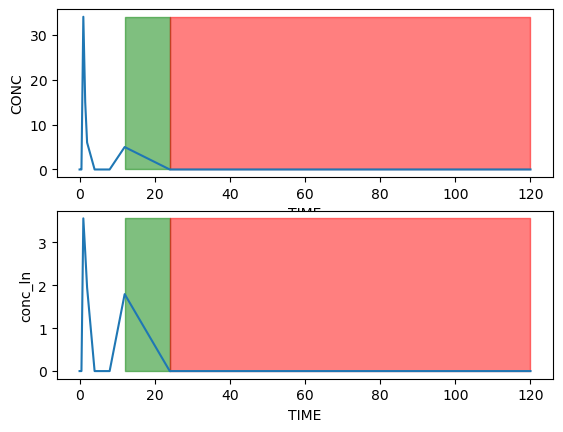

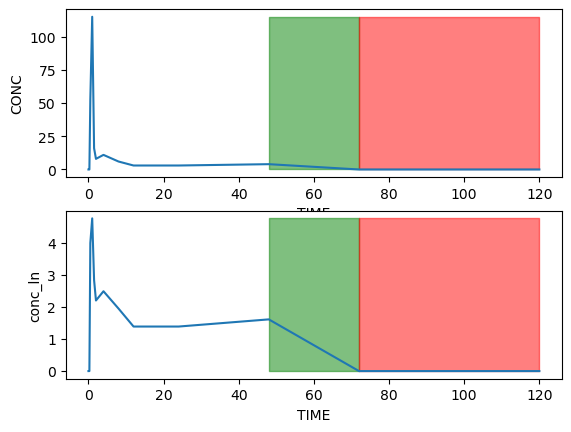

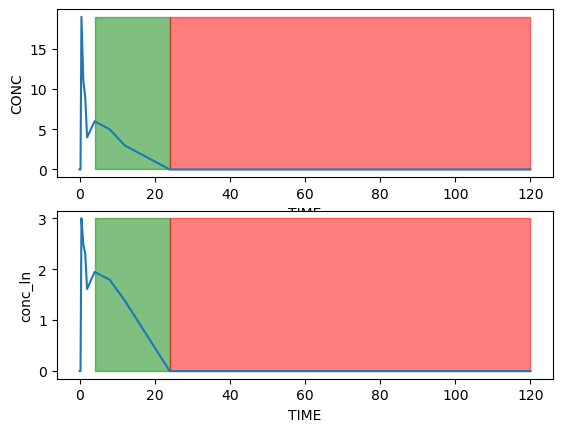

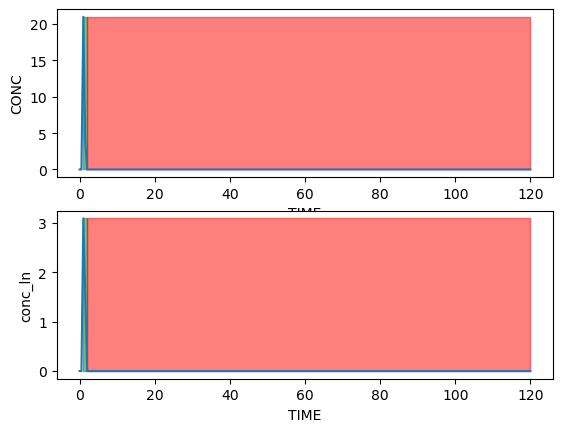

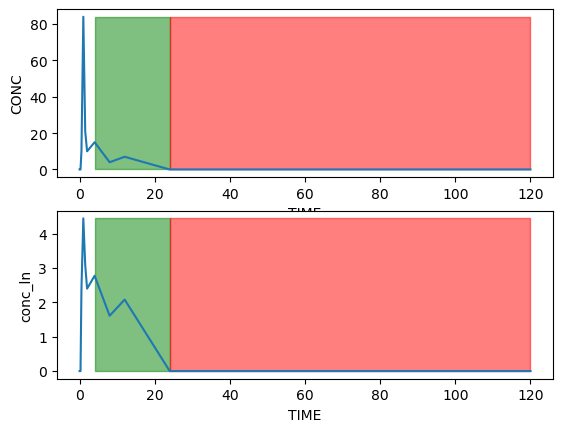

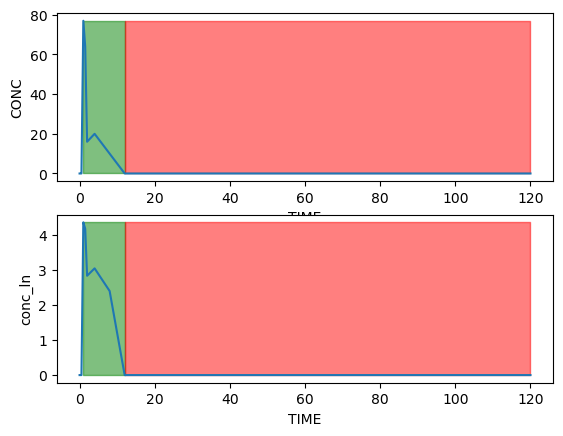

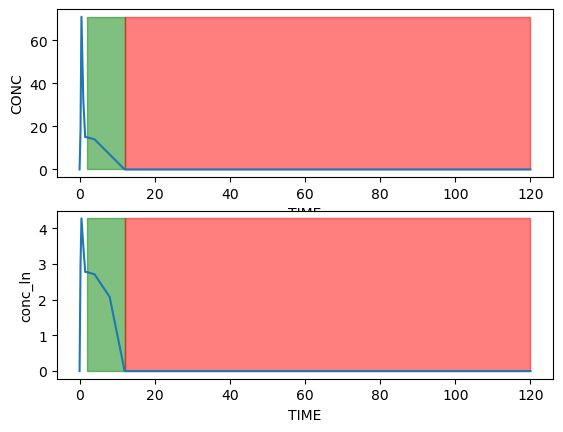

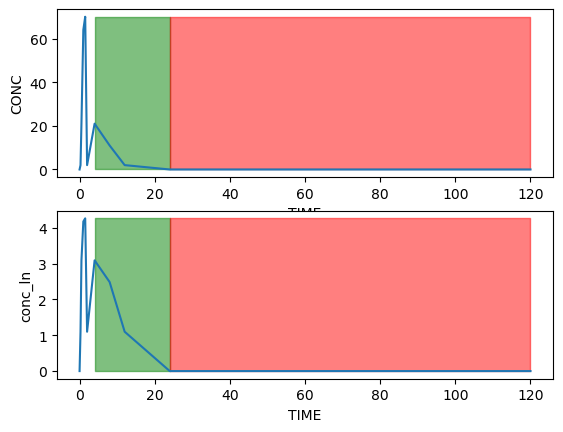

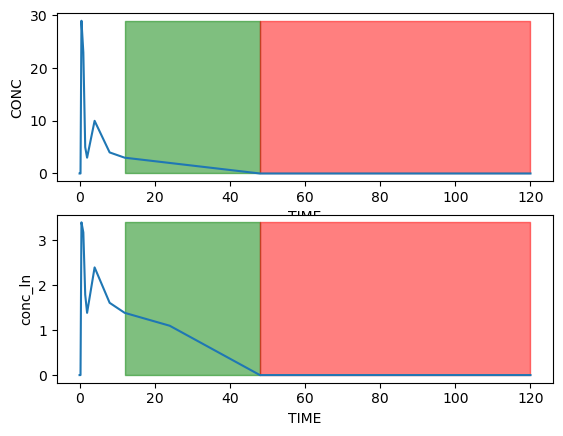

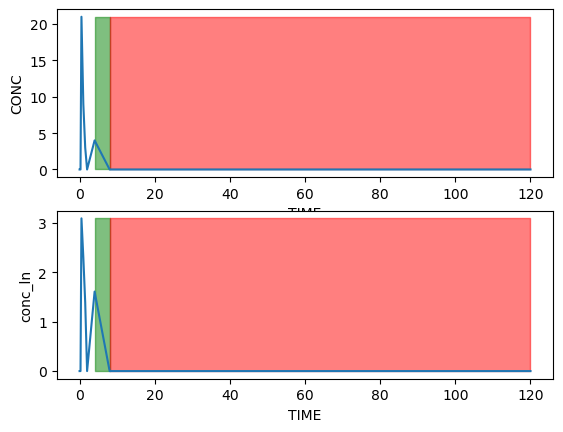

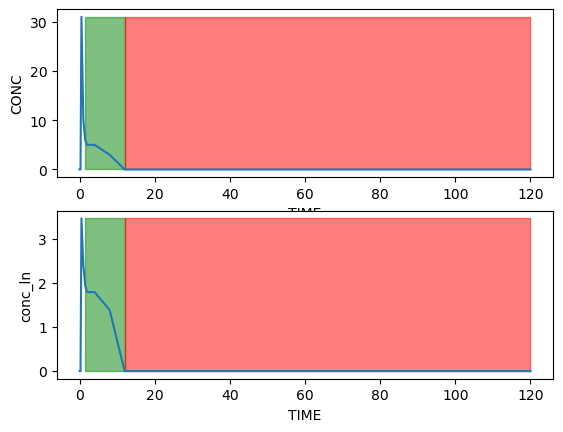

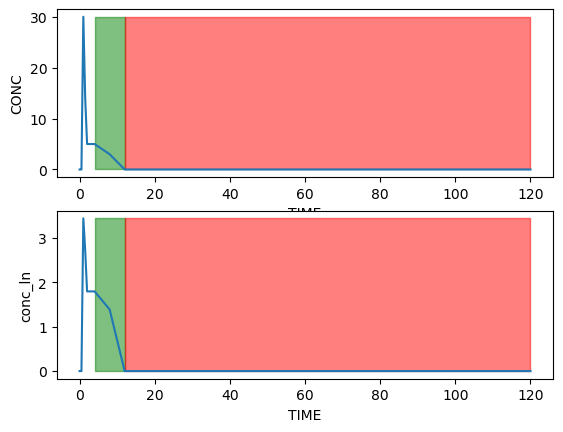

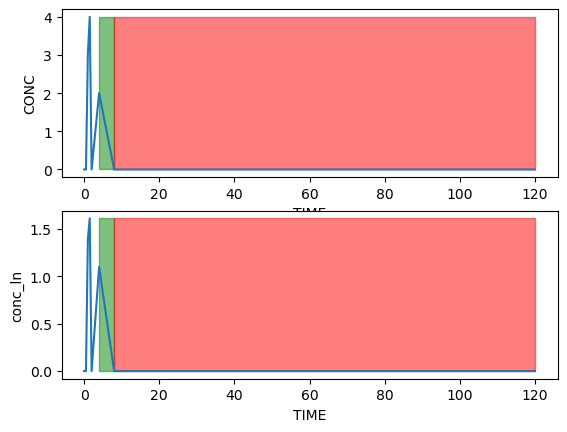

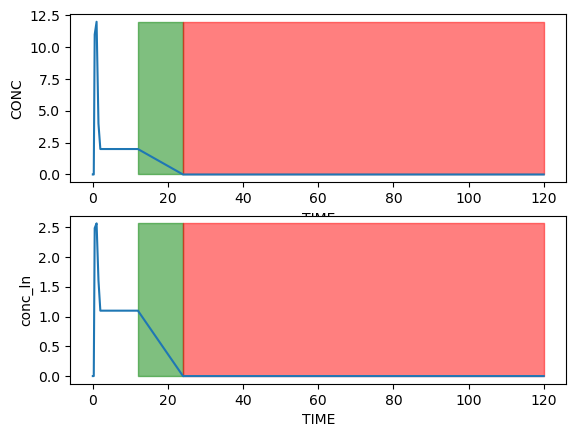

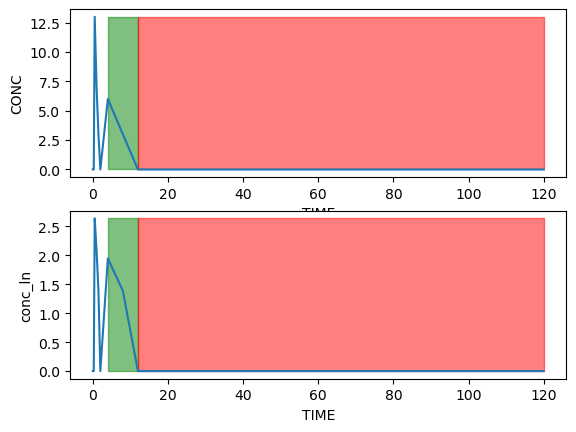

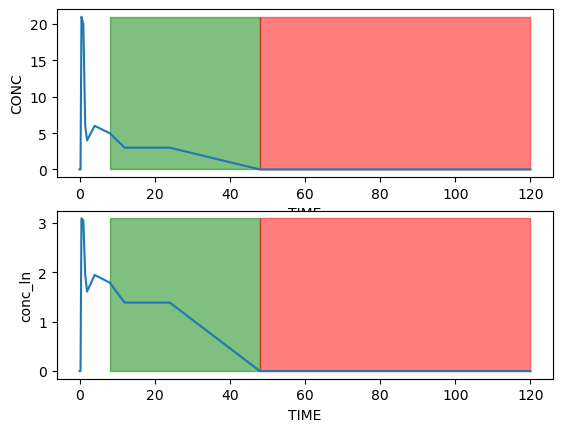

In [ ]:
import seaborn as sns
from utils import safe_signed_log
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import os

plot_dir = 'plots'
if not os.path.exists(plot_dir):
    os.makedirs('plots')

for id in xth_df['ID'].unique():
    fig, axs = plt.subplots(2)
    plot_me = xth_df.loc[(xth_df['ID'] == id) & (xth_df['TIME'] < 200), :].copy()
    info_df = ks.loc[ks['ID'] == id, ]
    plot_me['conc_ln'] = safe_signed_log(plot_me['CONC'])
    sns.lineplot(plot_me, x = 'TIME', y = 'CONC',ax = axs[0])
    y_max = plot_me['CONC'].max()
    y_max_ln = plot_me['conc_ln'].max() 
    terminal_slope_start = info_df['start_time'].values[0]
    terminal_slope_end = info_df['end_time'].max()
    x_max = plot_me['TIME'].max()
    zero_zone_start = info_df['zero_window_time_start'].values[0]
    axs[0].fill_betweenx(y = np.linspace(0, y_max, 5),
                        x1 = np.repeat(terminal_slope_start, 5),
                        x2 = np.repeat(terminal_slope_end, 5),
                        alpha = .5, color = 'green',
                        label = 'Terminal Slope Zone'
                        )
    axs[0].fill_betweenx(y = np.linspace(0, y_max, 5),
                        x1 = np.repeat(zero_zone_start, 5),
                        x2 = np.repeat(x_max, 5),
                        alpha = .5, color = 'red',
                        label = '~0 AUC Zone'
                        )
    sns.lineplot(plot_me, x = 'TIME', y = 'conc_ln',ax = axs[1])
    axs[1].fill_betweenx(y = np.linspace(0, y_max_ln, 5),
                        x1 = np.repeat(terminal_slope_start, 5),
                        x2 = np.repeat(terminal_slope_end, 5),
                        alpha = .5, color = 'green',
                        label = 'Terminal Slope Zone'
                        )
    axs[1].fill_betweenx(y = np.linspace(0, y_max_ln, 5),
                        x1 = np.repeat(zero_zone_start, 5),
                        x2 = np.repeat(x_max, 5),
                        alpha = .5, color = 'red',
                        label = '~0 AUC Zone'
                        )
    plt.suptitle(f'{id} Concentration Time Profile')
    
    plt.savefig(os.path.join(plot_dir, f'{id}_conctime.png'), dpi = 300)


<Axes: xlabel='TIME', ylabel='CONC'>

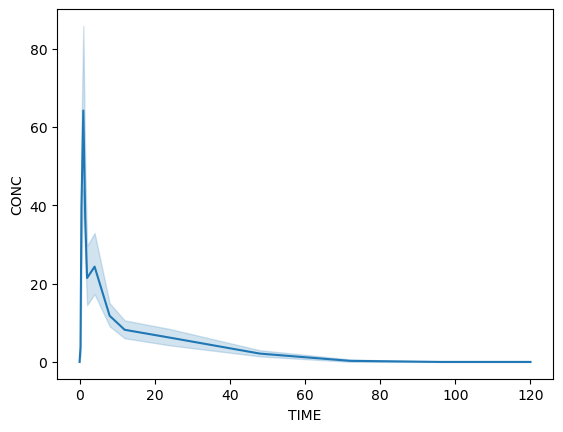

In [17]:
import seaborn as sns


sns.lineplot(xth_df, x = 'TIME', y = 'CONC',)

# MRT

In [18]:
from sklearn.metrics import auc

In [19]:
xth_df['ConcTime'] = xth_df['CONC'] * xth_df['TIME']

<Axes: xlabel='TIME', ylabel='ConcTime'>

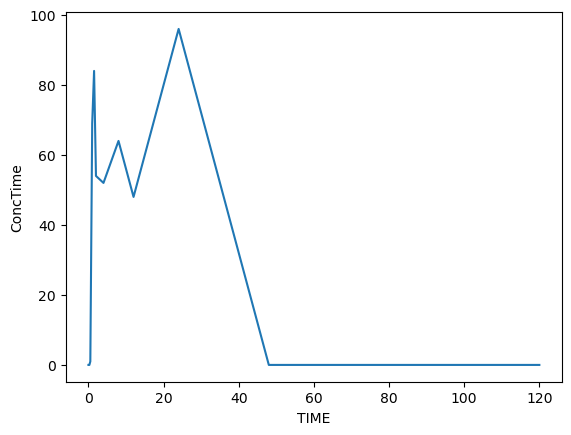

In [20]:
plot_me = xth_df.loc[(xth_df['ID'] == 'M10') & (xth_df['TIME'] < 200), :].copy()
sns.lineplot(plot_me, x = 'TIME', y = 'ConcTime',)

In [21]:
auc_df = (xth_df
 .groupby('ID')[['TIME', 'CONC']]
 .apply(lambda x: auc(x['TIME'], x['CONC']))
 .reset_index()
 .rename(columns = {0:'AUC'})
 )

auc_df.head()


,ID,AUC
0,H1,941.875
1,H10,820.875
2,H11,1038.500
3,H12,899.125
4,H13,425.000


In [22]:
zero_starts

,ID,zero_window_time_start,consecutive_zero_windows
0,L1,24.0,4
1,L2,72.0,2
2,L3,24.0,4
3,L4,2.0,8
4,L5,24.0,4
5,L6,12.0,5
6,L7,12.0,5
7,L8,24.0,4
8,L9,48.0,3
9,L10,8.0,6


In [23]:
auc_calc_df = xth_df.merge(zero_starts, how = 'left', on = 'ID').merge(ks, how = 'left', on = 'ID').copy()

In [24]:
auc_calc_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex,ConcTime,zero_window_time_start,consecutive_zero_windows,geom_mean_k_est,geom_mean_halflife_est
0,L1,0.00,0,xanthohumol,20.0,oral,M,0.0,24.0,4,0.149313,4.641248
1,L1,0.25,0,xanthohumol,NaN,NaN,M,0.0,24.0,4,0.149313,4.641248
2,L1,0.50,0,xanthohumol,NaN,NaN,M,0.0,24.0,4,0.149313,4.641248
3,L1,1.00,34,xanthohumol,NaN,NaN,M,34.0,24.0,4,0.149313,4.641248
4,L1,1.50,15,xanthohumol,NaN,NaN,M,22.5,24.0,4,0.149313,4.641248
...,...,...,...,...,...,...,...,...,...,...,...,...
667,H17,24.00,6,xanthohumol,NaN,NaN,M,144.0,48.0,3,0.050860,13.625760
668,H17,48.00,0,xanthohumol,NaN,NaN,M,0.0,48.0,3,0.050860,13.625760
669,H17,72.00,0,xanthohumol,NaN,NaN,M,0.0,48.0,3,0.050860,13.625760
670,H17,96.00,0,xanthohumol,NaN,NaN,M,0.0,48.0,3,0.050860,13.625760


In [25]:
from nca import calculate_aucs, extend_auc_to_inf, extend_aumc_to_inf
debugging_tmp = False
auc_df = []
aumc_df = []
for sub in auc_calc_df['ID'].unique():
    
        #orig_settings = np.seterr(all='raise')
    work_df = auc_calc_df.loc[auc_calc_df['ID'] == sub, :].copy()
    conc = work_df['CONC'].values
    time = work_df['TIME'].values
    zero_start = work_df['zero_window_time_start'].unique()[0]
    terminal_k = work_df['geom_mean_k_est'].unique()[0]
    if sub == 'M10':
        debugging_tmp = True
        debug_vars = {}
        debug_vars['conc'] = np.copy(conc)
        debug_vars['time'] = np.copy(time)
        debug_vars['zero_start'] = np.copy(zero_start)
        debug_vars['terminal_k'] = np.copy(terminal_k)
    aucs = calculate_aucs(time,conc , zero_start, terminal_k)
    auc_inf = extend_auc_to_inf(time, conc, zero_start, terminal_k)
    aucs = pd.concat([aucs, auc_inf]).sort_values(by = 'time_start')
    aucs['zero_window_time_start'] = zero_start
    aucs['terminal_k'] = terminal_k
    #if debugging_tmp:
        #np.seterr(**orig_settings) 
    aucs['ID'] = sub
    conctime = time * conc
    aumcs = calculate_aucs(time, conctime, zero_start, terminal_k, )
    #aumc_inf = extend_aumc_to_inf(work_df['TIME'].values, work_df['ConcTime'].values, zero_start, terminal_k)
    aumc_inf = extend_aumc_to_inf(time, conc, zero_start, terminal_k)
    aumcs = pd.concat([aumcs, aumc_inf]).sort_values(by = 'time_start')
    aumcs['zero_window_time_start'] = zero_start
    aumcs['terminal_k'] = terminal_k
    aumcs['ID'] = sub
    auc_df.append(aucs)
    aumc_df.append(aumcs)
auc_df = pd.concat(auc_df).reset_index(drop = True)
aumc_df = pd.concat(aumc_df).reset_index(drop = True)
#auc_df = auc_df.merge(aucmc_df, how = 'left', on = 'ID')

In [43]:
tmp = aumc_df.loc[aumc_df['ID'] == 'M10', :]

In [44]:
f1 = aumc_df['time_start'] < aumc_df['zero_window_time_start']
f2 = aumc_df['time_end'] < aumc_df['zero_window_time_start']
f3 = (aumc_df['time_start'] < aumc_df['zero_window_time_start']) & (aumc_df['time_end'] == np.inf)
tmp = aumc_df.loc[(f1 & f2) | f3, :].copy()

In [45]:
aumcs_res = tmp.groupby('ID')[['section_auc_log_trap', 'section_auc']].sum()

In [32]:
f1 = tmp['time_start'] < tmp['zero_window_time_start']
f2 = tmp['time_end'] < tmp['zero_window_time_start']
f3 = (tmp['time_start'] < tmp['zero_window_time_start']) & (tmp['time_end'] == np.inf)
tmp = tmp.loc[(f1 & f2) | f3, :]

In [34]:
tmp[['section_auc_log_trap', 'section_auc']].cumsum()

,section_auc_log_trap,section_auc
378,0.000000,0.000000
379,0.360674,0.125000
380,9.923732,17.625000
381,48.552461,55.875000
382,83.010024,90.375000
383,190.997677,196.375000
384,426.181862,428.375000
385,652.676840,652.375000
386,1496.150058,1516.375000
388,4246.120339,4266.345281


In [27]:
aumc_df.loc[aumc_df['ID'] == 'P1', 'section_auc'].cumsum()

0      3.545000
1     13.380000
2     28.040000
3     46.310000
4     89.450000
5    161.045000
6    231.650000
7    349.370000
8    430.730000
9    585.571889
Name: section_auc, dtype: float64

In [28]:
auc_df.loc[auc_df['ID'] == 'P1', :]

,time_start,time_end,conc_start,conc_end,section_auc_log_trap,section_auc,section_conc_change_sign,linup_logdown,logup_lindown,linear_auc,log_auc,zero_window_time_start,ID
0,0,1.0,8.00,7.09,8.00000,7.54500,False,82.0,63.585,63.585,82.0,inf,P1
1,1,2.0,7.09,6.29,7.00000,6.69000,False,82.0,63.585,63.585,82.0,inf,P1
2,2,3.0,6.29,5.58,6.00000,5.93500,False,82.0,63.585,63.585,82.0,inf,P1
3,3,4.0,5.58,4.95,6.00000,5.26500,False,82.0,63.585,63.585,82.0,inf,P1
4,4,6.0,4.95,3.89,10.00000,8.84000,False,82.0,63.585,63.585,82.0,inf,P1
5,6,9.0,3.89,2.71,12.00000,9.90000,False,82.0,63.585,63.585,82.0,inf,P1
6,9,12.0,2.71,1.89,9.00000,6.90000,False,82.0,63.585,63.585,82.0,inf,P1
7,12,18.0,1.89,0.92,14.00000,8.43000,False,82.0,63.585,63.585,82.0,inf,P1
8,18,24.0,0.92,0.44,10.00000,4.08000,False,82.0,63.585,63.585,82.0,inf,P1
9,24,inf,0.44,0.00,4.51841,4.51841,False,NaN,NaN,NaN,NaN,inf,P1


In [39]:
f1 = auc_df['time_start'] < auc_df['zero_window_time_start']
f2 = auc_df['time_end'] < auc_df['zero_window_time_start']
f3 = (auc_df['time_start'] < auc_df['zero_window_time_start']) & (auc_df['time_end'] == np.inf)
tmp = auc_df.loc[(f1 & f2) | f3, :].copy()

In [42]:
aucs_res = tmp.groupby('ID')[['section_auc_log_trap', 'section_auc']].sum()

In [49]:
aucs_res

,section_auc_log_trap,section_auc
ID,,
H1,1016.197139,1084.044455
H10,842.123456,848.475643
H11,991.301499,1093.809664
H12,966.804387,967.405277
H13,507.395640,473.812801
H14,950.690837,940.901715
H15,344.900702,419.928401
H16,1851.208633,1879.833375
H17,490.653636,484.596948


In [47]:
aumcs_res/aucs_res

,section_auc_log_trap,section_auc
ID,,
H1,35.308061,33.157581
H10,18.587753,18.956652
H11,19.113359,17.851447
H12,24.702401,24.833824
H13,25.768791,27.670741
H14,19.478397,19.905681
H15,40.514111,33.371776
H16,13.799538,13.720717
H17,16.134886,16.375109


In [28]:
xth_df.loc[xth_df['ID'] == 'M9', :]

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex,ConcTime
616,M9,0.00,0,xanthohumol,NaN,NaN,F,0.0
617,M9,0.25,0,xanthohumol,NaN,NaN,F,0.0
618,M9,0.50,4,xanthohumol,NaN,NaN,F,2.0
619,M9,1.00,22,xanthohumol,NaN,NaN,F,22.0
620,M9,1.50,30,xanthohumol,NaN,NaN,F,45.0
621,M9,2.00,29,xanthohumol,NaN,NaN,F,58.0
622,M9,4.00,15,xanthohumol,NaN,NaN,F,60.0
623,M9,8.00,5,xanthohumol,NaN,NaN,F,40.0
624,M9,12.00,3,xanthohumol,NaN,NaN,F,36.0
625,M9,24.00,3,xanthohumol,NaN,NaN,F,72.0


In [28]:
auc_df['MRT'] = aucmc_df['linup_logdown'] / auc_df['linup_logdown']

In [29]:
nca_df = pd.read_csv(r'/workspaces/miniconda/PKdata/data/xanthohumol_nca.csv')
#mrt_df = nca_df.loc[nca_df['Parameter'] == 'AUC']
mrt_df = nca_df.loc[nca_df['ANALYTE'] == 'xanthohumol', :]

In [30]:
mrt_df = mrt_df.pivot_table(index = ['ID', 'Software'],columns = 'Parameter', values = 'Value').reset_index()

In [31]:
plot_me = mrt_df.merge(auc_df[['ID', 'linup_logdown', 'linear_auc']], how = 'left', on = 'ID')

In [32]:
plot_me.loc[plot_me['linup_logdown'] < 0, :]

,ID,Software,AUC,AUMC,CL.F,Cmax,MRT,Tmax,Vss,Vz.F,lambda.z,thalf,linup_logdown,linear_auc


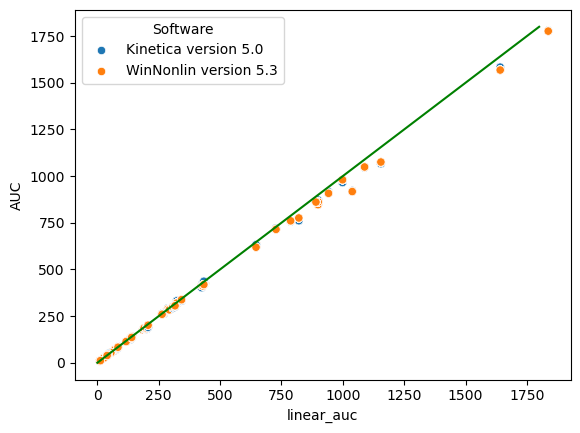

In [33]:
import matplotlib.pyplot as plt

sns.scatterplot(plot_me, x = 'linear_auc', y = 'AUC', hue = 'Software')
plt.plot(np.linspace(0,1800, 10), np.linspace(0,1800, 10), color = 'green')

In [34]:
plot_tmp = plot_me.loc[plot_me['linup_logdown'] >0, :]

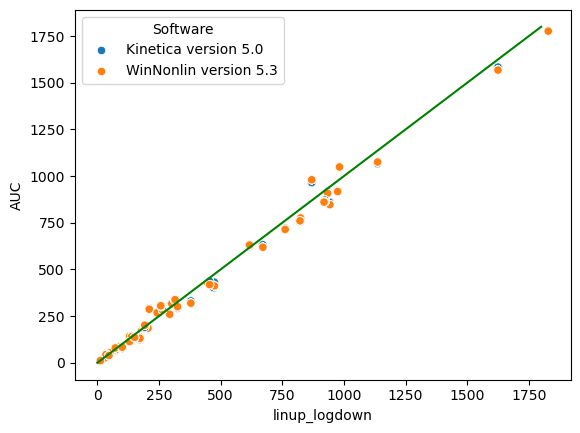

In [35]:
sns.scatterplot(plot_tmp, x = 'linup_logdown', y = 'AUC', hue = 'Software')
plt.plot(np.linspace(0,1800, 10), np.linspace(0,1800, 10), color = 'green')

In [36]:
plot_me = mrt_df.merge(aucmc_df[['ID', 'linup_logdown', 'linear_auc']], how = 'left', on = 'ID')

In [37]:
auc_df.loc[auc_df['ID'] == 'M10']

,time_start,time_end,conc_start,conc_end,section_auc_log_trap,section_auc,section_conc_change_sign,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID,MRT
351,0.00,0.25,0,0,0.000000,0.00,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
352,0.25,0.50,0,2,0.455120,0.25,True,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
353,0.50,1.00,2,69,10.635316,17.75,True,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
354,1.00,1.50,69,56,31.638796,31.25,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
355,1.50,2.00,56,27,20.398208,20.75,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
356,2.00,4.00,27,13,40.395461,40.00,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
357,4.00,8.00,13,8,45.265997,42.00,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
358,8.00,12.00,8,4,27.220760,24.00,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
359,12.00,24.00,4,4,0.000000,48.00,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943
360,24.00,48.00,4,0,59.648154,48.00,False,242.567376,265.090435,272.0,272.0,235.657812,M10,8.345943


In [38]:
aucmc_df.loc[aucmc_df['ID'] == 'M10']

,time_start,time_end,conc_start,conc_end,section_auc_log_trap,section_auc,section_conc_change_sign,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID
351,0.00,0.25,0.0,0.0,0.000000,0.000,False,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
352,0.25,0.50,0.0,1.0,0.360674,0.125,True,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
353,0.50,1.00,1.0,69.0,9.563058,17.500,True,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
354,1.00,1.50,69.0,84.0,38.628729,38.250,True,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
355,1.50,2.00,84.0,54.0,34.457563,34.500,False,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
356,2.00,4.00,54.0,52.0,107.987653,106.000,False,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
357,4.00,8.00,52.0,64.0,235.184185,232.000,True,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
358,8.00,12.00,64.0,48.0,226.494978,224.000,False,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
359,12.00,24.00,48.0,96.0,843.473218,864.000,True,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10
360,24.00,48.00,96.0,0.0,503.638374,1152.000,False,2024.453569,2643.709864,2668.375,2668.375,1999.788432,M10


In [39]:
plot_me

,ID,Software,AUC,AUMC,CL.F,Cmax,MRT,Tmax,Vss,Vz.F,lambda.z,thalf,linup_logdown,linear_auc
0,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,17628.898767,18816.6875
1,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,17628.898767,18816.6875
2,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,17628.898767,18816.6875
3,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,17628.898767,18816.6875
4,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,17628.898767,18816.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,1574.725485,2030.7500
1244,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,1574.725485,2030.7500
1245,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,1574.725485,2030.7500
1246,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,1574.725485,2030.7500


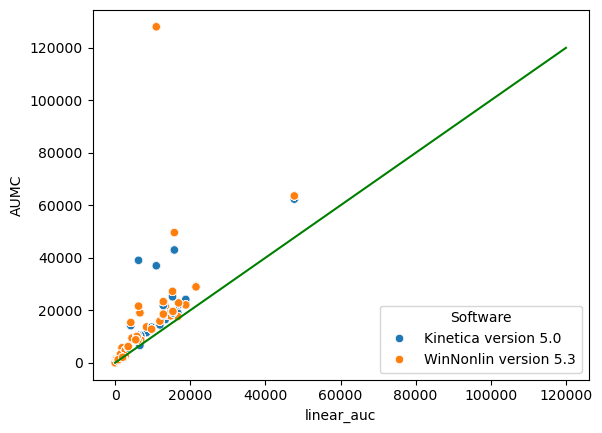

In [40]:
sns.scatterplot(plot_me, x = 'linear_auc', y = 'AUMC', hue = 'Software')
plt.plot(np.linspace(0,120000, 10), np.linspace(0,120000, 10), color = 'green')

# CL/F

In [16]:
auc_df = xth_df.merge(auc_df, how = 'left', on = 'ID')

In [17]:
auc_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex,ConcTime,AUC,AUCMC,MRT
0,L1,0.00,0,xanthohumol,20.0,oral,M,0.0,72.000,523.2500,7.267361
1,L1,0.25,0,xanthohumol,NaN,NaN,M,0.0,72.000,523.2500,7.267361
2,L1,0.50,0,xanthohumol,NaN,NaN,M,0.0,72.000,523.2500,7.267361
3,L1,1.00,34,xanthohumol,NaN,NaN,M,34.0,72.000,523.2500,7.267361
4,L1,1.50,15,xanthohumol,NaN,NaN,M,22.5,72.000,523.2500,7.267361
...,...,...,...,...,...,...,...,...,...,...,...
667,H17,24.00,6,xanthohumol,NaN,NaN,M,144.0,438.625,4512.4375,10.287689
668,H17,48.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689
669,H17,72.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689
670,H17,96.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689


In [ ]:
auc_df['dose_ug'] = auc_df['DOSE'] * 1000
auc_df['cl/f'] = auc_df['dose_ug']/auc_df['AUC']
clf_df = auc_df[['ID', 'cl/f']].dropna().copy()
clf_df #these are close, but the AUC I was calculating should 

,ID,cl/f
0,L1,277.777778
15,L2,61.279203
30,L3,237.741456
45,L4,1600.000000
60,L5,107.671602
75,L6,104.986877
90,L7,139.494333
105,L8,99.564406
120,L9,148.560817
135,L10,772.946860
